# Passenger Satisfaction - Classification Problem 

Building a customer-centric airline means offering passengers memorable and lasting experiences. Each customer has their own set of expectations when it comes to their interactions with airlines. Airlines have the opportunity to provide a personalized travel experience that matches or exceeds those specific expectations.
This project aims to help any airline to become a Customer-Centric Airline by predicting which flight services affect most on customer satisfaction based on passenger characteristics.


In [51]:
Image(url= "https://github.com/Gh0fran/T5_Bootcamp/blob/main/Data%20Description.JPG?raw=true")

#  Q: Which service should airlines focus on to increase customer satisfaction?  

# Part 1: Exploratory Data Analysis

## Importing Libraries

In [52]:
# importing libraries
import sys 
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix ,accuracy_score , plot_confusion_matrix ,plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'png'

%matplotlib inline 

## Dataset

In [53]:
# read data
data = pd.read_csv('US_Airline_passenger_satisfaction_survey.csv')
Original_data= data

In [54]:
data.head(5)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,0,4,3,0,3,3,1,5,3,3,4,3,0,0.0
1,72091,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,1,4,2,1,3,2,1,1,4,4,3,2,0,0.0
2,29663,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,0,4,3,0,3,3,3,5,3,2,3,3,0,0.0
3,81849,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,0,3,4,0,4,4,5,4,5,5,5,4,0,0.0
4,83693,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,0,3,3,5,3,3,3,4,5,3,4,3,0,0.0


## Size of the dataset 

In [55]:
data.shape

(129880, 24)

## Identification of variables and data types

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

### Numerical variables:
#### Disceret
Age, Flight Distance ,Departure Delay in Minutes 
####  Satisfaction ratings on a scale from 1 to 5 
1:Very unsatisfied , 2:unsatisfied , 3:Neutral , 4:satisfied , 5:Very satisfied

Inflight wifi service , Departure/Arrival time convenient, Ease of Online booking,Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service,Baggage handling, Checkin service, Inflight service, Cleanliness

#### Continuous
Arrival Delay in Minutes

### Categorical variables:
satisfaction_v2, Gender, Customer Type, Type of Travel, Class



The target value is satisfaction_v2, and the rest 23 features can be assumed as the predictor variables.

## Columns Name Modification

In [57]:
# modifying features name to remove white spaces and /
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace('/', '_')
data.columns = data.columns.str.replace('-', '_')
data.columns = data.columns.str.replace('satisfaction_v2', 'satisfaction')


## Finding null values

In [58]:
data.apply(lambda x: sum(x.isnull()),axis=0)

id                                     0
satisfaction                           0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure_Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On_board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             393
dtype: int64

In [59]:
# here we can find missing 393 vaules for 'Arrival Delay in Minutes' column
# it equals to 0.3 % of total responses , we can drop them. 
data.dropna(subset=['Arrival_Delay_in_Minutes'], inplace=True)

In [60]:
data.shape

(129487, 24)

## Statistical Summary of Numeric Variables:

In [61]:
data.describe()

,id,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,64958.335169,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,37489.781165,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32494.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64972.000000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97415.500000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Findings
Scale features should be from 1 to 5, having 0 as min indicates un-answered question 

Removing rows with 0 rating 

In [62]:
# skipping the score of Departure_Arrival_time_convenient 
Keep_answered_mask = ((data.Departure_Arrival_time_convenient  != 0) &(data.Inflight_wifi_service  != 0)
                     & (data.Ease_of_Online_booking  != 0) &(data.Gate_location  != 0) &(data.Food_and_drink  != 0)
                     & (data.Online_boarding  != 0) & (data.Leg_room_service  != 0) & (data.Checkin_service  != 0)
                     & (data.Inflight_service  != 0) & (data.Cleanliness  != 0) & (data.Baggage_handling  != 0))

data = data[Keep_answered_mask]
data.shape


(119204, 24)

# Categorical features visualization

## Data Balance

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

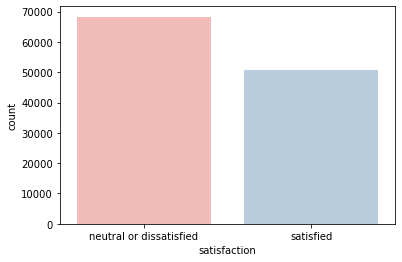

In [63]:
sns.countplot(data.satisfaction , palette='Pastel1' )

The reporting Satisfied 'satisfied' are balanced with passengers reporting Neutral/Dissatisfied . 
The high number entries in negative class is not surprising since ‘Neutral/Dissatisfied’ does not necessarily means dissatisfaction

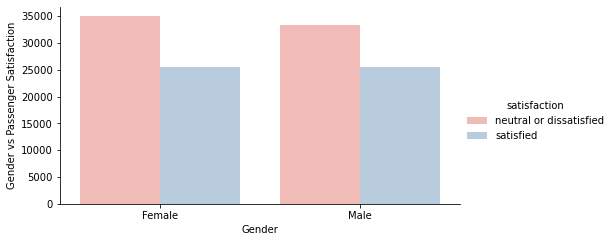

In [64]:
gender = sns.catplot(x="Gender", data=data, kind='count', hue='satisfaction', palette='Pastel1' ,height=3.27, aspect=4/2)
gender.set_ylabels('Gender vs Passenger Satisfaction')

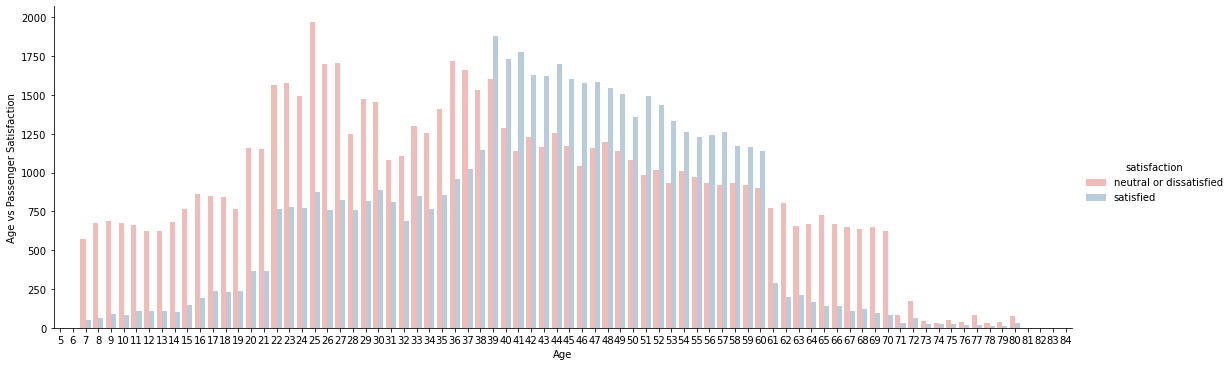

In [65]:
    g = sns.catplot(x="Age", data=data, aspect=3.0, kind='count', hue='satisfaction',palette='Pastel1', order=range(5, 85))
    g.set_ylabels('Age vs Passenger Satisfaction')
    g.set_xlabels('Age')

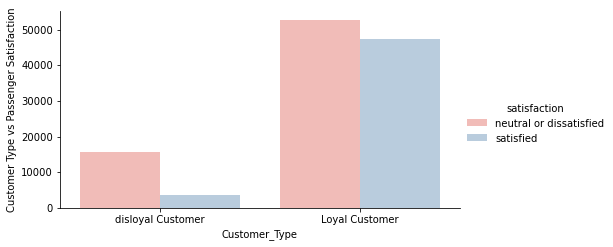

In [66]:
    g = sns.catplot(x="Customer_Type", data=data, kind='count', hue='satisfaction', palette='Pastel1',height=3.27, aspect=4/2  )
    g.set_ylabels('Customer Type vs Passenger Satisfaction')

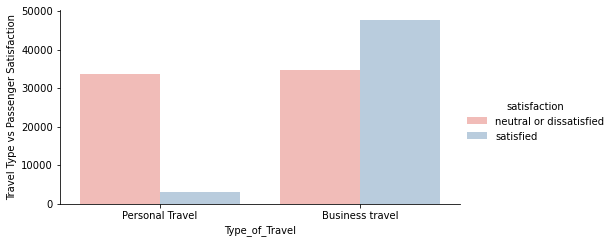

In [67]:
    g = sns.catplot(x="Type_of_Travel", data=data, kind='count', hue='satisfaction', palette='Pastel1',height=3.27, aspect=4/2 )
    g.set_ylabels('Travel Type vs Passenger Satisfaction')

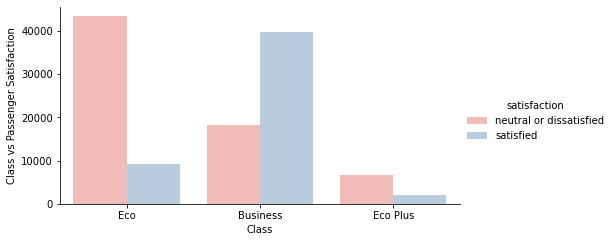

In [68]:
    gender = sns.catplot(x="Class", data=data,  kind='count', hue='satisfaction', palette='Pastel1' , height=3.27, aspect=4/2)
    gender.set_ylabels('Class vs Passenger Satisfaction')

When I further segment the satisfaction classes by Type_of_Travel, we see that Personal travel customers have a lower ratio of satisfaction. In addition, when I segment the satisfaction classes by class , it is observed that customers on Eco class have significantly lower ratio of satisfaction. 
In both cases, higher expectation of experience might have played a part in the reduction of satisfaction.

# Q: Do Class and Travel Type play a role in passenger satisfactions?

# 

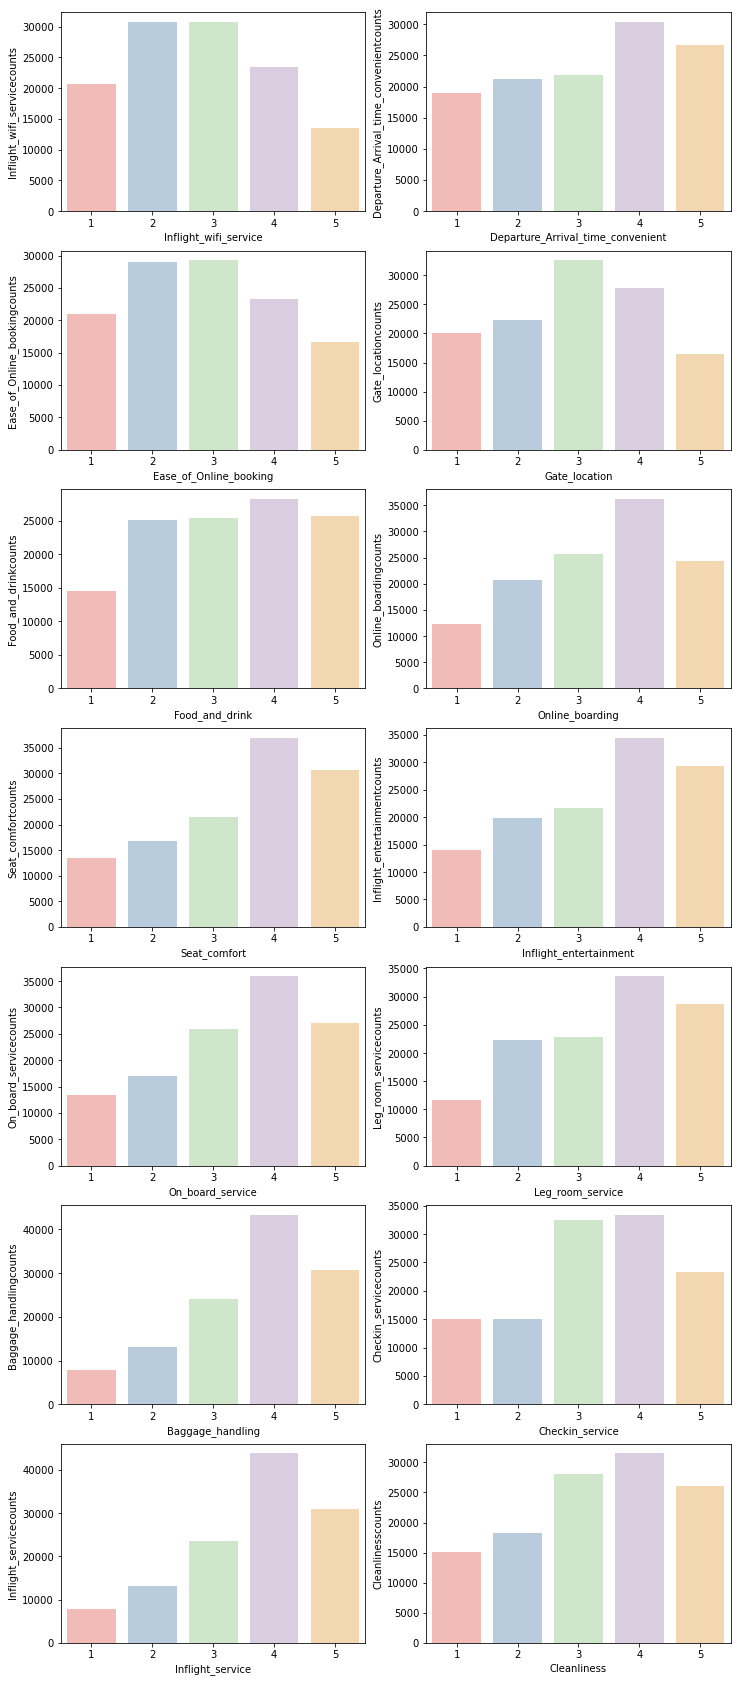

In [69]:
fig, ax_rows = plt.subplots(7, 2, figsize=(12, 30))
features=['Inflight_wifi_service','Departure_Arrival_time_convenient','Ease_of_Online_booking','Gate_location','Food_and_drink','Online_boarding','Seat_comfort','Inflight_entertainment','On_board_service','Leg_room_service','Baggage_handling','Checkin_service','Inflight_service','Cleanliness']
for feature in features:
    feature_data = data.groupby([feature]).size().reset_index(name=feature+'counts')
    degree = features.index(feature)
    ax_row_left, ax_row_right = ax_rows[degree//2]
    if degree%2 == 0:
        ax = ax_row_left
    else:
        ax = ax_row_right
    sns.barplot(x=feature, y=feature+'counts', palette="Pastel1", data=feature_data ,ax=ax )


    

## Outliers  in Numerical

In [70]:
#Return values at the given quantile over requested axis
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                                   64606.5
Age                                     23.0
Flight_Distance                       1335.0
Inflight_wifi_service                    2.0
Departure_Arrival_time_convenient        2.0
Ease_of_Online_booking                   2.0
Gate_location                            2.0
Food_and_drink                           2.0
Online_boarding                          2.0
Seat_comfort                             3.0
Inflight_entertainment                   2.0
On_board_service                         2.0
Leg_room_service                         2.0
Baggage_handling                         2.0
Checkin_service                          2.0
Inflight_service                         2.0
Cleanliness                              2.0
Departure_Delay_in_Minutes              13.0
Arrival_Delay_in_Minutes                13.0
dtype: float64


In [71]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(98614, 24)

##  Encoding of Categorical Variables

In [72]:
data['Male'] = data['Gender'].apply(lambda x: "1" if x == "Male" else "0")
data['Male'] = (data['Male'].astype(int))
data['Loyal'] = data['Customer_Type'].apply(lambda x: "1" if x == "Loyal Customer" else "0")
data['Loyal'] = (data['Loyal'].astype(int))
data['Business_Class'] = data['Class'].apply(lambda x: "1" if x == "Business" else "0")
data['Business_Class'] = (data['Business_Class'].astype(int))
data['Personal_Travel'] = data['Type_of_Travel'].apply(lambda x: "1" if x == "Business travel" else "0")
data['Personal_Travel'] = (data['Personal_Travel'].astype(int))

In [73]:
data['satisfied'] = data['satisfaction'].apply(lambda x: "1" if x == "satisfied" else "0")
data['satisfied'] = (data['satisfied'].astype(int))

In [74]:
data.drop(['Gender','Customer_Type', 'Class','Type_of_Travel','satisfaction'] , inplace =True ,axis=1)

In [75]:
pd.set_option("display.max_columns", None)
corr= data.corr()
corr

,id,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Male,Loyal,Business_Class,Personal_Travel,satisfied
id,1.000000,0.019614,0.099624,-0.039655,-0.003791,-0.002483,0.001021,-0.007348,0.044157,0.047949,-0.003898,0.055026,0.040402,0.072442,0.077931,0.077165,0.019728,0.077261,0.010959,0.003146,-0.006876,0.103718,-0.001378,0.005785
Age,0.019614,1.000000,0.076784,0.018735,-0.015879,0.020238,-0.003740,0.014967,0.188383,0.156320,0.073705,0.069152,0.056463,-0.039309,0.039416,-0.045526,0.045649,-0.008728,-0.014505,0.008521,0.251203,0.136193,0.063395,0.149566
Flight_Distance,0.099624,0.076784,1.000000,0.006994,-0.072732,0.051814,0.005003,0.052945,0.193430,0.154261,0.130546,0.120858,0.135727,0.073315,0.078610,0.068896,0.093706,0.011753,-0.005338,0.005797,0.195952,0.453979,0.266203,0.296363
Inflight_wifi_service,-0.039655,0.018735,0.006994,1.000000,0.392315,0.686577,0.382962,0.134733,0.462188,0.138215,0.223833,0.122597,0.158192,0.113309,0.048026,0.103509,0.148594,-0.031087,-0.042165,0.004569,0.016284,0.040816,0.124662,0.378937
Departure_Arrival_time_convenient,-0.003791,-0.015879,-0.072732,0.392315,1.000000,0.512313,0.514411,-0.011543,0.062279,-0.013934,-0.041145,0.078085,-0.008070,0.079828,0.120132,0.082282,0.001288,-0.007813,-0.010851,0.005916,0.098695,-0.127911,-0.258279,-0.060458
Ease_of_Online_booking,-0.002483,0.020238,0.051814,0.686577,0.512313,1.000000,0.522303,0.019941,0.366528,0.032315,0.036817,0.033242,0.088683,0.024736,0.014465,0.023084,0.017909,-0.015320,-0.022066,0.002891,0.030980,0.108106,0.125574,0.234488
Gate_location,0.001021,-0.003740,0.005003,0.382962,0.514411,0.522303,1.000000,-0.001054,0.001222,0.005065,0.004359,-0.028639,-0.006350,0.002039,-0.042400,0.001234,-0.003505,0.001539,0.002703,-0.001723,-0.007696,0.005037,0.032509,0.003096
Food_and_drink,-0.007348,0.014967,0.052945,0.134733,-0.011543,0.019941,-0.001054,1.000000,0.248376,0.573967,0.628754,0.058242,0.033415,0.032150,0.074308,0.032037,0.653978,-0.011499,-0.024699,0.003653,0.057168,0.086790,0.070611,0.213187
Online_boarding,0.044157,0.188383,0.193430,0.462188,0.062279,0.366528,0.001222,0.248376,1.000000,0.431613,0.315394,0.173722,0.140532,0.099190,0.204108,0.088234,0.341145,-0.027736,-0.051953,-0.041773,0.189713,0.329472,0.228127,0.572911
Seat_comfort,0.047949,0.156320,0.154261,0.138215,-0.013934,0.032315,0.005065,0.573967,0.431613,1.000000,0.626992,0.141353,0.115301,0.081144,0.171475,0.075411,0.668884,-0.010209,-0.027134,-0.030321,0.156572,0.243508,0.141455,0.366241


<AxesSubplot:>

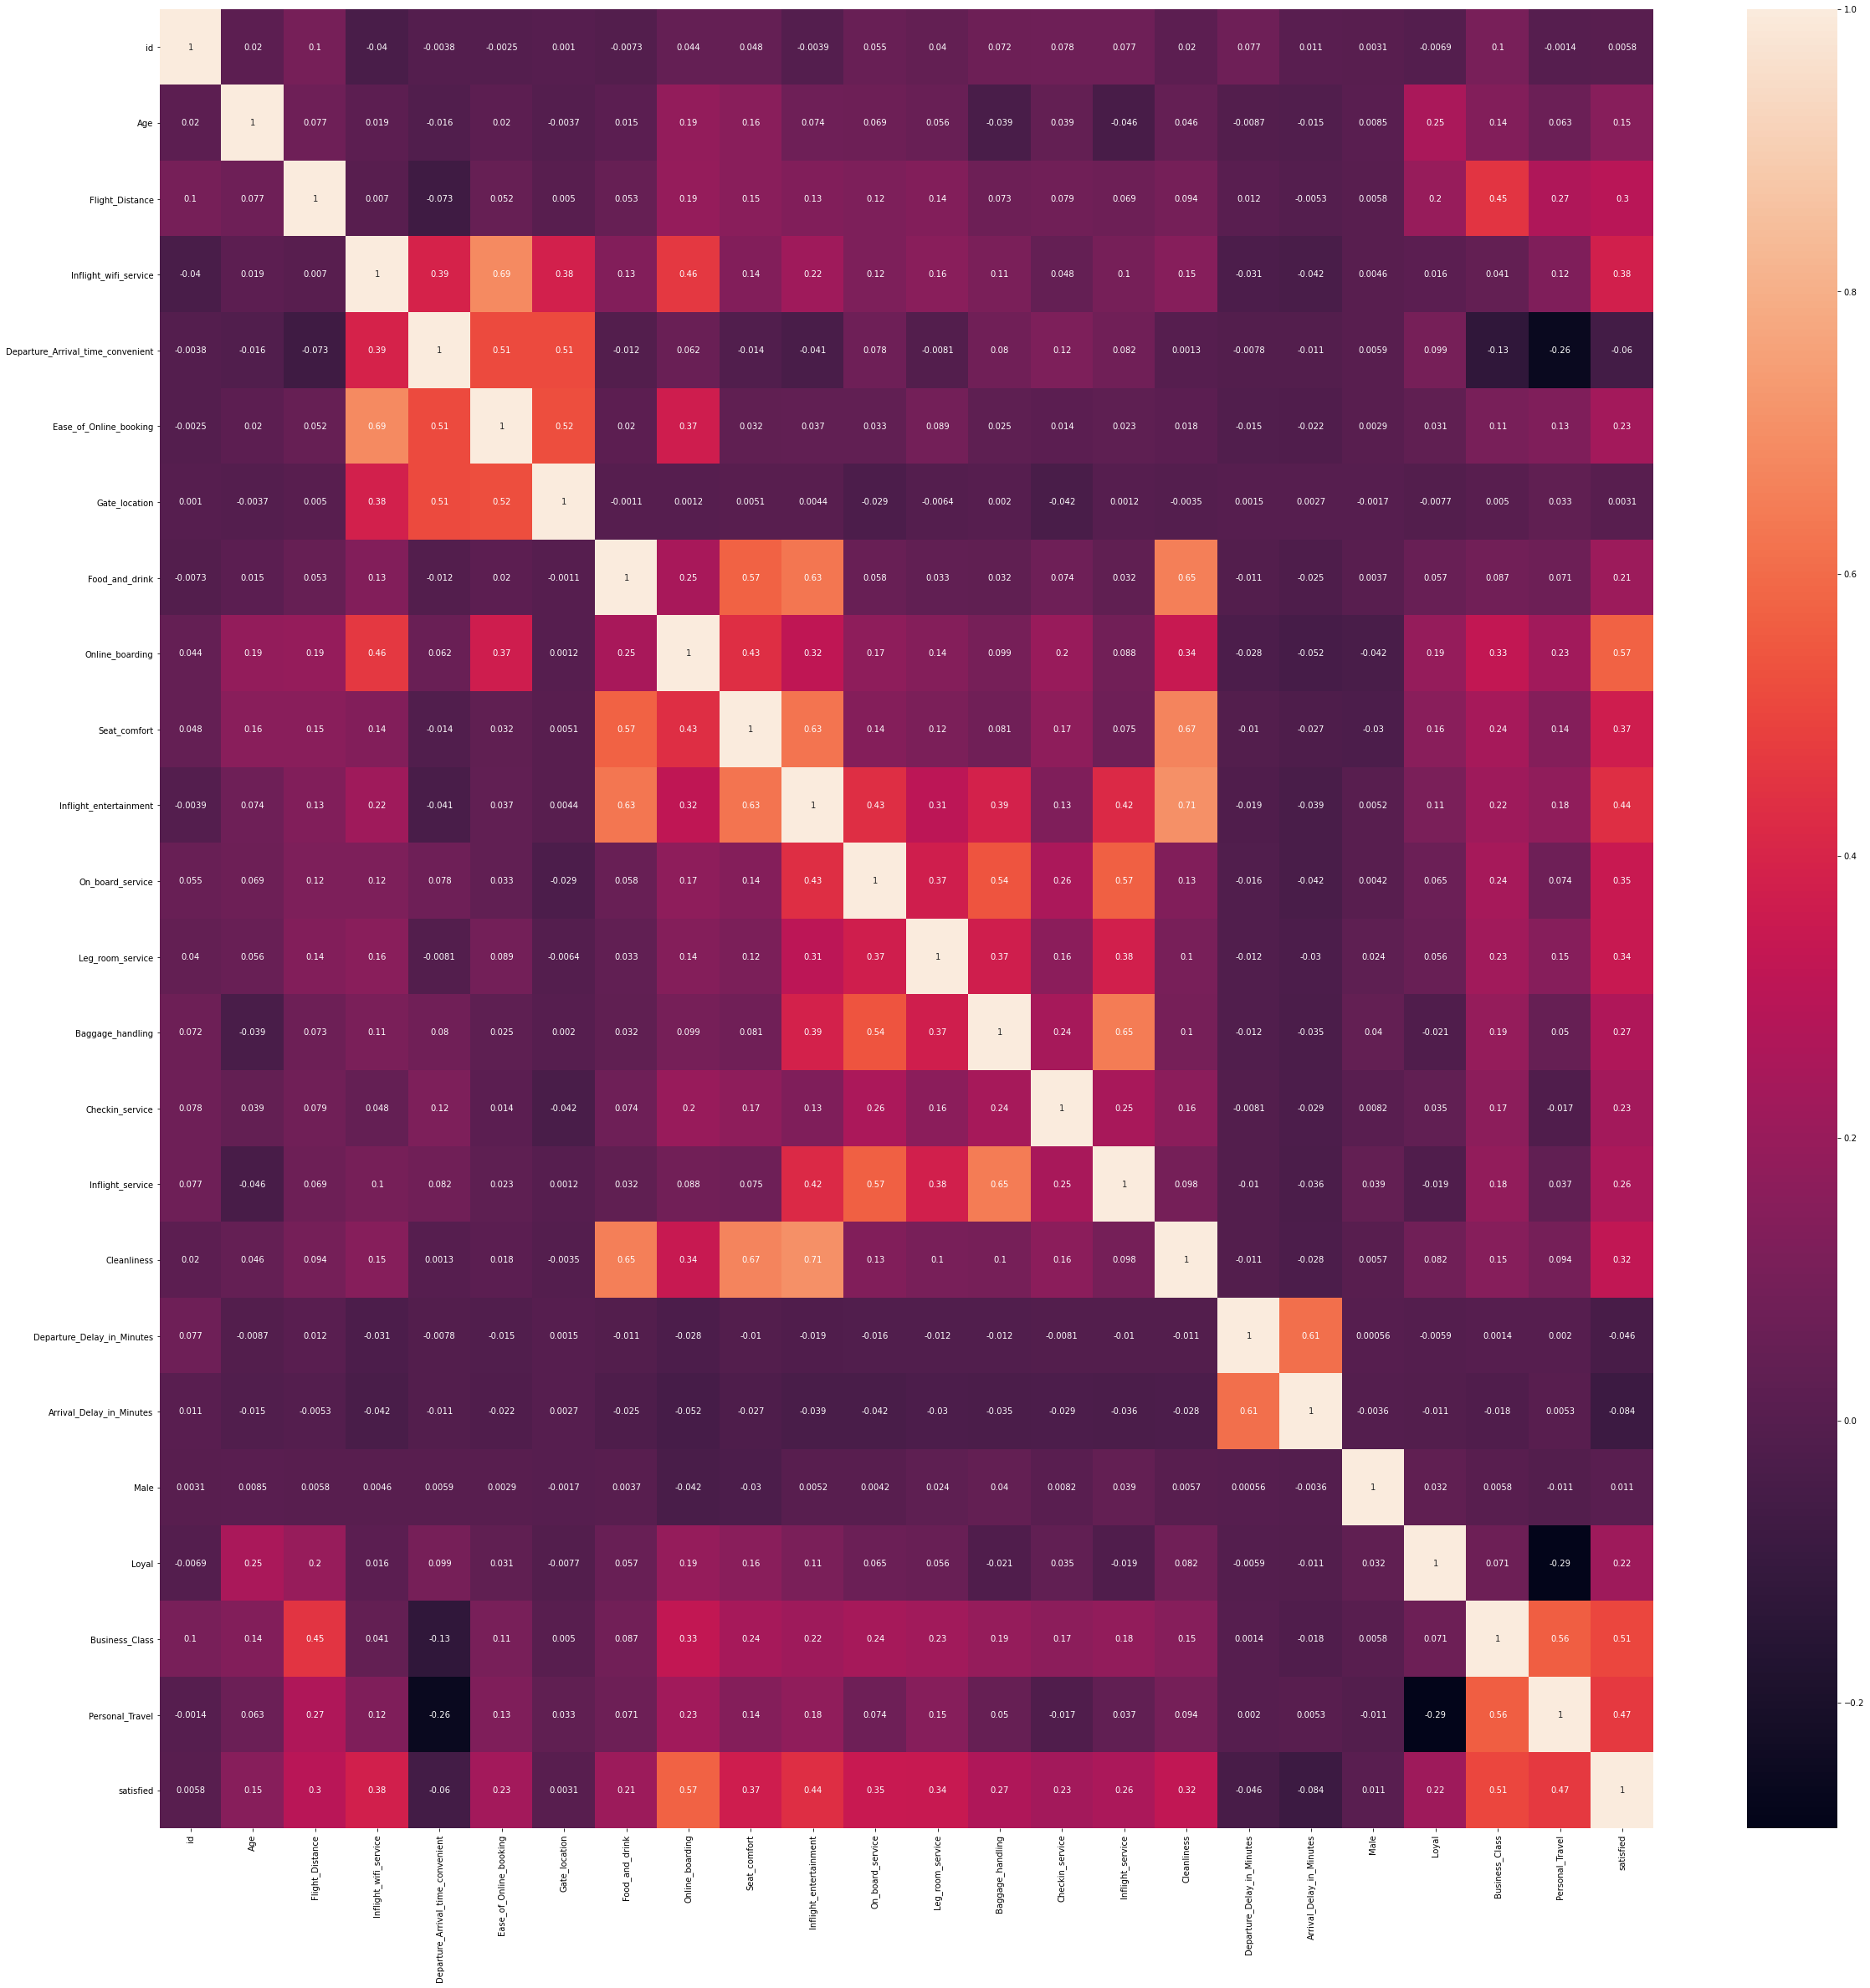

In [76]:
plt.figure(figsize=[40,40])
sns.heatmap(corr,annot=True)


High correlations:
"Inflight_wifi_service" and "Ease_of_Online_booking" corr=0.686577
"Inflight_service" and h "Baggage_handling" corr= 0.645941

Since no pair has corr. = 1 it's mean no multicollinearity.
we will keep the features

In [77]:
data.drop(['id','Departure_Arrival_time_convenient', 'Gate_location', 'Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes'] , inplace =True ,axis=1)

# Part 2: Modeling

# Linear Regression ,Ridge Regression and PolynomialFeatures

In [78]:
X = data.drop(['satisfied'],axis=1)
y= data['satisfied']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=50) #hold out 20% of the data for final testing

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=10)

#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

#Since this scaling is part of our model, 
#we need to scale using the training set feature distributions and apply the same scaling to validation and test 
#without refitting the scaler. 
X_train_scaled = scaler.fit_transform(X_train.values) 
# fit_transform: the model will learn the mean and std of all training set features


X_val_scaled = scaler.transform(X_val.values) 
#transform: transforming all the features by using mean and std, 
#we use the same the mean and std, by mean we are not calculating them
#just applying from training data , not learning
# why> to prevent data lackage , let our model learn about teast and train

X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.5)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.626
Ridge Regression val R^2: 0.626
Degree 2 polynomial regression val R^2: 0.759


# Decision Tree

In [79]:
X = data.drop('satisfied',axis=1)
y = data['satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=101)

In [80]:

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [81]:
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     27850
           1       0.93      0.93      0.93     21457

    accuracy                           0.94     49307
   macro avg       0.94      0.94      0.94     49307
weighted avg       0.94      0.94      0.94     49307



In [82]:
print(confusion_matrix(y_test,predictions))

[[26271  1579]
 [ 1421 20036]]


# Random Forest 

In [83]:
X = data.drop('satisfied',axis=1)
y = data['satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=101)

In [84]:
rfc = RandomForestClassifier(n_estimators=600)

In [85]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [86]:
predictions = rfc.predict(X_test)

In [87]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     27850
           1       0.97      0.94      0.95     21457

    accuracy                           0.96     49307
   macro avg       0.96      0.96      0.96     49307
weighted avg       0.96      0.96      0.96     49307



In [88]:
print(confusion_matrix(y_test,predictions))  

[[27172   678]
 [ 1362 20095]]


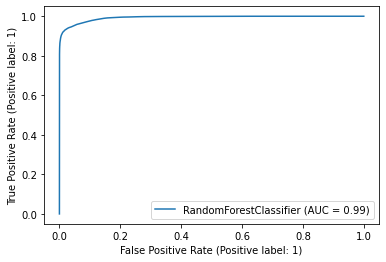

In [89]:
plot_roc_curve(rfc, X_test, y_test)   

Random Forest has performed very well on both Accuracy and area under ROC curve. 

## Based on the score metric, Random forest classifier is the best models. 

#  Q: Which service should airlines focus to increase customer satisfaction?  

The usual way to compute the feature importance values of a single tree is as follows:

1- initialize an array feature_importances with Xs

2- you traverse the tree: for each internal node that splits on feature i you compute the error reduction of that node multiplied by the number of samples that were routed to the node and add this quantity to feature_importances

In [90]:
importances = rfc.feature_importances_
std = np.std([rfc.feature_importances_ for tree in rfc.estimators_], axis=0)

feature_importances_: 
The impurity-based feature importances.
The higher, the more important the feature.
(there is a high clear cut distinction)
It is also known as the Gini importance.

Maximize info gain = reduce Gini impurity

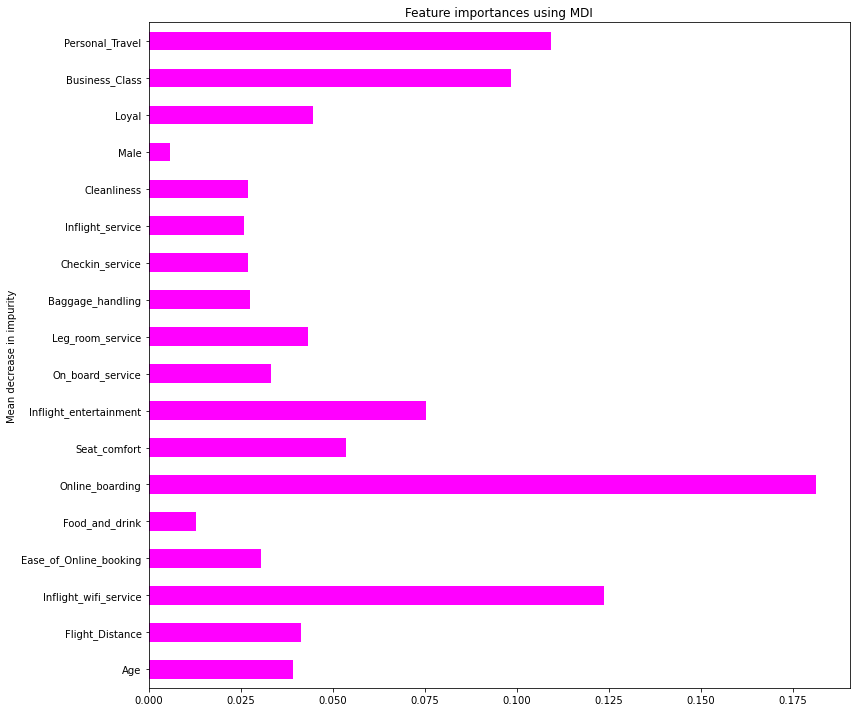

In [91]:
feature_names = X.columns.tolist()
forest_importances = pd.Series(importances, index=feature_names)
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(12, 10))
forest_importances.plot.barh(yerr=std, ax=ax ,cmap='spring' )
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# A: the most important services are:
### 1- Online_boarding
### 2- Inflight_wifi_service
### 3- Inflight entertainment

## another passenger criteria affect on their satisfactions
### 3- Travel Type
### 4- Class

# Q: Do Class and Travel Type play a role in passenger satisfactions?
# A: Yes